# Student Admission Prediction Challenge Submission

Jason Rosner, Spencer Beatty, Thomas Houlahan, Patrick Blais

In [90]:
import numpy as np
import pandas as pd
TRAINING_DATA_PATH = './data/Past_Students.csv'
PREDICTION_DATA_PATH = './data/Graduating_Class.csv'

### Load the Data

In [91]:
training_data_df = pd.read_csv(TRAINING_DATA_PATH, index_col=False)
X = training_data_df.drop(['Chance_of_Admit', 'Serial_No'], axis=1)
Y = training_data_df['Chance_of_Admit']

prediction_data_df = pd.read_csv(PREDICTION_DATA_PATH, index_col=False)
X_pred = prediction_data_df.drop(['Serial_No'], axis=1)

### Clean the Data

In [92]:
X = training_data_df.drop(['Chance_of_Admit', 'Serial_No'], axis=1)
Y = training_data_df['Chance_of_Admit']

X_pred = prediction_data_df.drop(['Serial_No'], axis=1)

### Model Architecture
Model is a simple MLP regressor. There are 7 input parameters which feed into a 14-wide layer, then two dense 32 unit layers. All internal nodes use ReLU activation, with the final output node using a linear activation function to return the probability of admission.

In [111]:
from keras import layers, models, losses

model = models.Sequential()
model.add(layers.Dense(14, activation='relu', input_shape=(X.shape[1],)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='linear'))

Model performance is measured using Mean Squared Error (MSE).

In [112]:
model.compile(loss="mean_squared_error", optimizer="adam", metrics=["mean_squared_error"])
model.fit(X, Y, epochs=300, batch_size=1, verbose=0, validation_split=0, shuffle=True)

### Plot of Loss (MSE) vs Epoch

Text(0.5, 0, 'epoch')

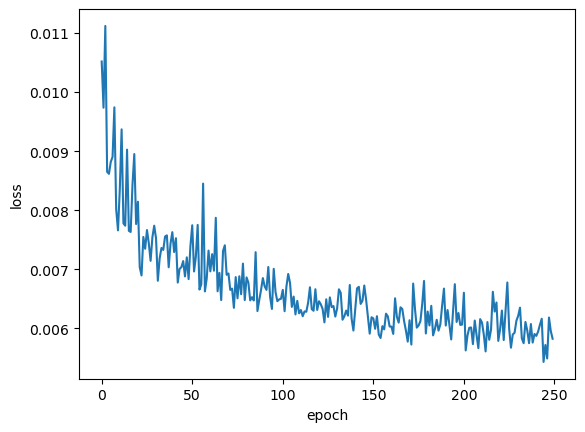

In [113]:
import matplotlib.pyplot as plt
plt.plot(model.history.history['loss'][50:])
plt.ylabel('loss')
plt.xlabel('epoch')

Average MSE after 200 epochs

In [116]:
print(np.average(model.history.history['loss'][200:]))

0.006072052107192576


Estimate Chance of Admission for Test Set

In [120]:
predictions = model.predict(X_pred)
prediction_data_df['Chance_of_Admit'] = predictions

2/2 [==============================] - 0s 3ms/step


Output with predictions

In [122]:
prediction_data_df.head()

,Serial_No,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,351,318,107,3,3.0,3.5,8.27,1,0.750235
1,352,325,110,4,3.5,4.0,8.67,1,0.825761
2,353,303,100,2,3.0,3.5,8.06,1,0.670307
3,354,300,102,3,3.5,2.5,8.17,0,0.635998
4,355,297,98,2,2.5,3.0,7.67,0,0.584720


Save the results

In [123]:
prediction_data_df.to_csv("Student Predictions FULL TRAINING SET.csv", index=False)